# Data visualization with various cuts.
## Transverse-momentum-dependent EIC pseudo data. 
## Data sets from Charlotte Van Hulse, Spring 2020 
### Penn State Berks, Spring 2020 
#### * Alexey  Prokudin*

In [3]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import fitpack
import interface
import obslib.sidis.reader
from qcdlib.auxiliary import AUX
from tools.config import conf
%matplotlib inline
# make plots interacts
%matplotlib notebook 

This function reads data from multiple files and merges the data frames.

In [4]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

upol_hermes_no_filters.py defines data files to read, no filters applied yet to the data selection. Here we read all HERMES multiplicities.

In [5]:
input_file = "../inputs/upol_eic_no_filters.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"
#filterstr = "yh_minus_yp>"

The interface.py allows to get configuration file from the file that we read.

In [6]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
#conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1020

In [7]:
print(", ".join(sorted(data.columns)))

Q2, Q2Max, Q2Min, R, R0, R1, R2, W2, col, dy, hadron, lnR, obs, pT, pTmax, pTmin, qT, relative_error_percent, sqrts, stat_u, target, value, x, xMax, xMin, xn, y, yf, yh, yi, yp, z, zMax, zMin, zn


In [8]:
data["R1"]

1736     7.462041
3799    11.432822
1735     7.193058
2847     7.986471
3798    10.959185
2676    11.466844
844      5.225669
4665    14.753184
2675    11.095863
4664    14.154186
7260    42.428803
2674    10.850295
1759     8.002066
5585    20.781917
2846     7.411827
1734     6.932684
843      4.884558
3797    10.447368
5584    20.251817
1758     7.938935
863      6.243669
4663    13.810209
2865     9.375720
2673    10.611754
5583    19.759926
862      6.142584
3641    15.462131
7259    46.697652
3640    15.272079
8043    30.740286
          ...    
6846     0.016042
4899     0.104627
4089     0.102130
5983     0.037755
1207     0.057840
7532     0.003908
3154     0.059280
5803     0.054113
2116     0.005016
4088     0.071385
310      0.073578
4254     0.037610
5128     0.001057
1246     0.004678
1206     0.097015
4087     0.048809
3153     0.026090
5127     0.015417
1205     0.126037
2115     0.039588
5982     0.011461
308      0.139673
309      0.107359
4086     0.019817
3152     0

In [9]:
data["yh_minus_yp"] = data["yh"] - data["yp"] 
data["yi_minus_yp_over_yp"] = np.sqrt(((data["yi"] - data["yp"]) / data["yp"])**2) 
data["yf_minus_yh_over_yh"] = np.sqrt(((data["yf"] - data["yh"]) / data["yh"])**2)
data["yi_minus_yp"] = np.sqrt(((data["yi"] - data["yp"]))**2) 
data["yf_minus_yh"] = np.sqrt(((data["yf"] - data["yh"]))**2)
# Ted's suggestion R2:
#data["R2"] = 1. - data["z"] *(1.-(data["pT"] / data["z"])**2) 

In [10]:
print(", ".join(sorted(data.columns)))

Q2, Q2Max, Q2Min, R, R0, R1, R2, W2, col, dy, hadron, lnR, obs, pT, pTmax, pTmin, qT, relative_error_percent, sqrts, stat_u, target, value, x, xMax, xMin, xn, y, yf, yf_minus_yh, yf_minus_yh_over_yh, yh, yh_minus_yp, yi, yi_minus_yp, yi_minus_yp_over_yp, yp, z, zMax, zMin, zn


We create QCUT which is qT^2/Q^2

In [11]:
data["QCUT"] = (data["qT"])**2 / (data["Q2"])

In [38]:

def custom_label(label):
    if label == "Q2":
        label = "$Q^2$"
    if label == "qT":
        label = "$q_T$"
    if label == "qT":
        label = "$q_T$"
    if label == "pT":
        label = "$P_T$"
    if label == "W2":
        label = "$W^2\; (GeV^2)$"
    if label == "qToverQ":
        label = "$q_T/Q$"
    if label == "qToverQ2":
        label = "$q_T^2/Q^2$"
    if label == "dy":
        label = "$y_p-y_h$"
    if label == "yh_minus_yp":
        label = "$y_h-y_p$"
    if label == "yi":
        label = "$y_i$"
    if label == "yf":
        label = "$y_f$"
    if label == "yh":
        label = "$y_h$"
    if label == "yp":
        label = "$y_p$"
    if label == "yi_minus_yp":
        label = "$|y_i - y_p|$"
    if label == "yf_minus_yh":
        label = "$|y_f - y_h|$"
    if label == "yi_minus_yp_over_yp":
        label = "$|(y_i - y_p)/yp|$"
    if label == "yf_minus_yh_over_yh":
        label = "$|(y_f - y_h)/yh|$"
    if label == "R":
        label = "$|R|$"    
    if label == "lnR":
        label = "$ln(|R|)$"    
    if label == "R2":
        label = "$R_2$"    
    if label == "R1":
        label = "$R_1$"    
    if label == "R0":
        label = "$R_0$"    

    return label

def color_plot(data, vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    data_q = data["QCUT"]

    # colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig, ax = plt.subplots()

    #ax.set_title(custom_label(vert_lab) + " vs. " + custom_label(hor_lab))
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)
    
    # heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    # plt.colorbar(heatmap)

    fig.tight_layout()
    
    return fig, ax, vert, hor


def color_plot3D(data, x_lab, y_lab, z_lab, cmap="plasma", alpha=1.0):
    xval = data[x_lab].values
    yval = data[y_lab].values
    zval = data[z_lab].values


    data_q = data["QCUT"]

    # colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    color_percentiles = partial(percentileofscore, data_q)
    colors = data_q.apply(color_percentiles)
    
    fig = plt.figure()
    ax = Axes3D(fig)  # fig.add_subplot(111, projection = "3d")

    
    ax.scatter(xval, yval, zval, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)


    ax.set_zlabel(custom_label(z_lab))
    ax.set_ylabel(custom_label(y_lab))
    ax.set_xlabel(custom_label(x_lab))

    
    # heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    # plt.colorbar(heatmap)

    # fig.tight_layout()
    
    return fig, ax, xval, yval, zval

In [13]:
#data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["qT"] / (data["Q2"]**0.5)
data["qToverQ2"] = (data["qT"])**2 / (data["Q2"])

qT vs. qToverQ2
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632

qT vs. Q2
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9601

qT vs. dy
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632

qT vs. yh_minus_yp
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632

qToverQ2 vs. Q2
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9601

qToverQ2 vs. dy
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632

qToverQ2 vs. yh_minus_yp
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632

Q2 vs. dy
Number of points: 9632
Unique vertical values: 9601
Unique horizontal values: 9632

Q2 vs. yh_minus_yp
Number of points: 9632
Unique vertical values: 9601
Unique horizontal values: 9632

dy vs. yh_minus_yp
Number of points: 9632
Unique vertical values: 9632
Unique horizontal values: 9632



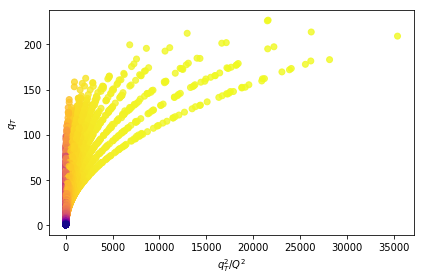

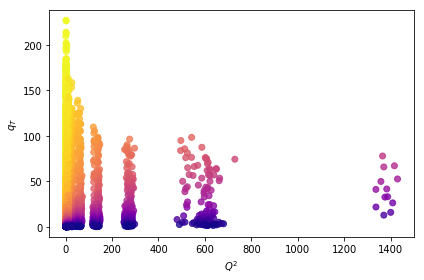

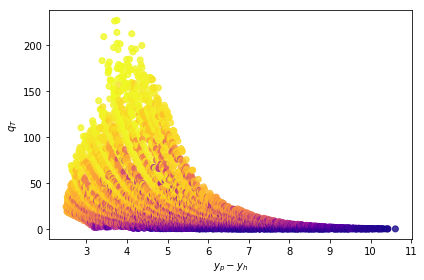

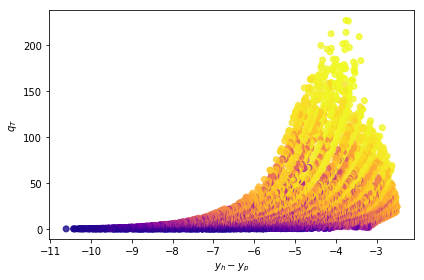

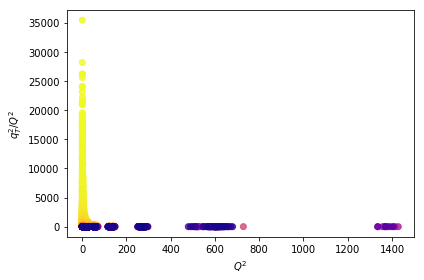

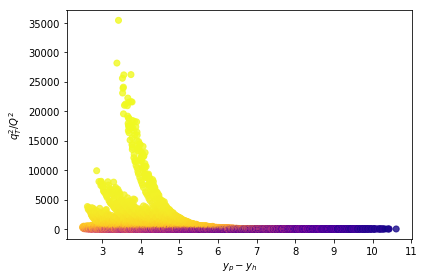

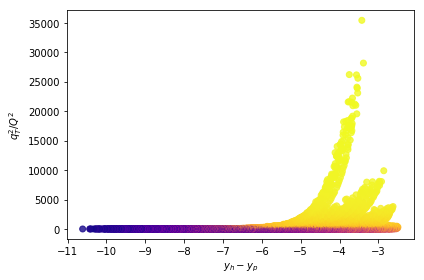

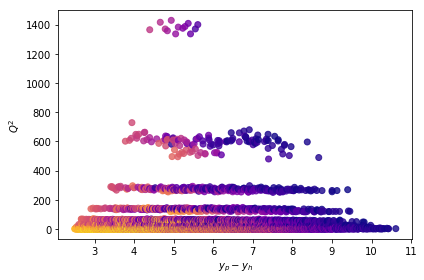

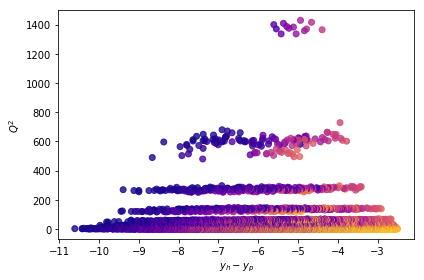

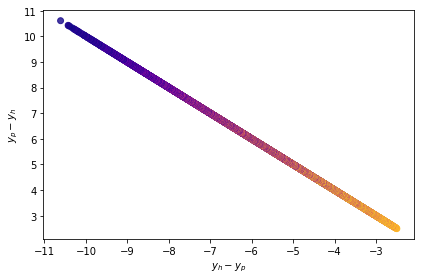

In [14]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("qT", "qToverQ2", "Q2", "dy", "yh_minus_yp")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(data, v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

# Let us study the whole EIC data set

In [15]:
len(data)

9632

In [16]:
len(data.query("z<0.2"))

6681

In [17]:
len(data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

4247

In [16]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

807

In [18]:
len(data.query("0.2<z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"))

954

In [19]:
len(data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy > 1.25"))

954

In [21]:
len(data.query("qToverQ<0.2"))

671

Kinematics of the data set

In [22]:
print(np.min(data["x"]))
print(np.max(data["x"]))

print(np.min(data["z"]))
print(np.max(data["z"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["Q2"]))
print(np.max(data["Q2"]))

print(np.min(data["pT"]))
print(np.max(data["pT"]))

0.00019
0.260269
0.004718
0.903036
1.153606
1428.730086
1.153606
1428.730086
0.021368
2.978355


In [23]:
data.keys()

Index([u'Q2', u'Q2Max', u'Q2Min', u'R', u'R0', u'R1', u'R2', u'W2', u'col',
       u'dy', u'hadron', u'lnR', u'obs', u'pT', u'pTmax', u'pTmin', u'qT',
       u'relative_error_percent', u'sqrts', u'stat_u', u'target', u'value',
       u'x', u'xMax', u'xMin', u'xn', u'y', u'yf', u'yh', u'yi', u'yp', u'z',
       u'zMax', u'zMin', u'zn', u'yh_minus_yp', u'yi_minus_yp_over_yp',
       u'yf_minus_yh_over_yh', u'yi_minus_yp', u'yf_minus_yh', u'QCUT',
       u'qToverQ', u'qToverQ2'],
      dtype='object')

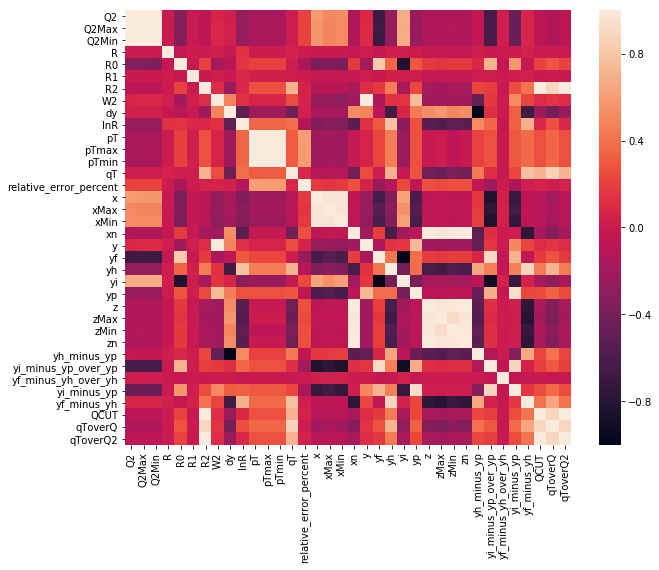

In [27]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
filtered_data = data.drop([
       'obs', 'value', 'stat_u', 'target', 'hadron', 'col', 'sqrts'
], axis=1)
corr = filtered_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

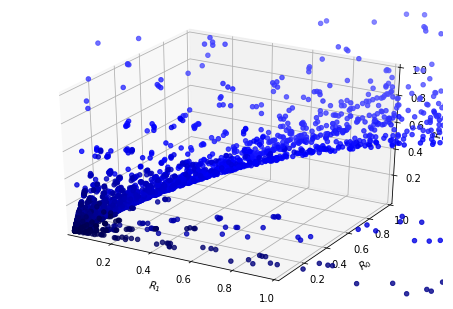

In [28]:
fig, ax, xval, yval, zval = color_plot3D(data, "R1", "R0", "R2", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
ax.set_ylim([0.0001, 1])
# ax.set_xscale("log")
ax.set_xlim([0.0001, 1])
ax.set_zlim([0.0001, 1])
# plt.axhline(1,0,1)
# plt.axvline(1,0,1)
# plt.savefig("../Figs/hermes_data_R2_R1.pdf")
plt.show()

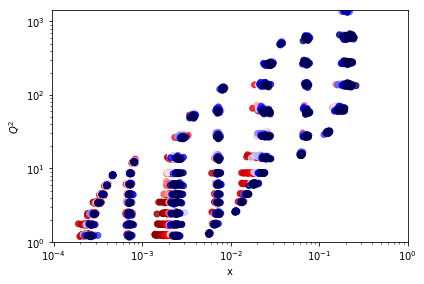

In [36]:
fig, ax, vert, hor = color_plot(data, "Q2", "x", cmap="seismic", alpha=0.8)
ax.set_yscale("log")
ax.set_ylim([1, np.max(data["Q2"])])
ax.set_xscale("log")
ax.set_xlim([np.min(data["x"])/2., 1])
plt.savefig("../Figs/eic_data_Q2_x.pdf")
plt.show()


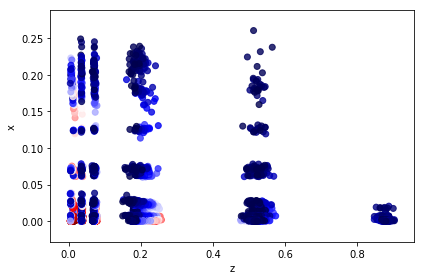

In [42]:
fig, ax, vert, hor = color_plot(data, "x", "z", cmap="seismic", alpha=0.8)
#ax.set_yscale("log")
#ax.set_xscale("log")
plt.savefig("../Figs/eic_data_x_z.pdf")
plt.show()

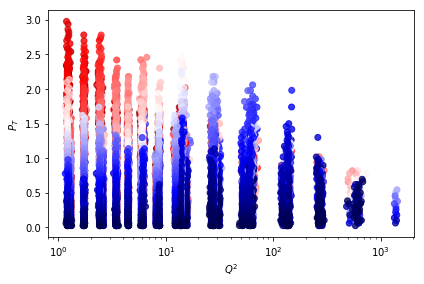

In [39]:
fig, ax, vert, hor = color_plot(data, "pT", "Q2", cmap="seismic", alpha=0.8)
ax.set_xscale("log")
plt.savefig("../Figs/eic_data_pT_Q2.pdf")
plt.show()

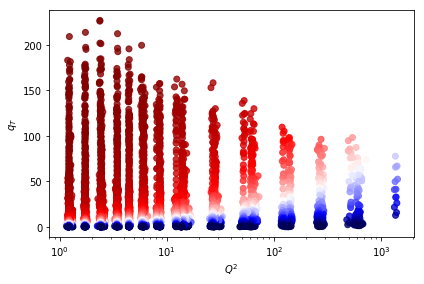

In [40]:
fig, ax, vert, hor = color_plot(data, "qT", "Q2", cmap="seismic", alpha=0.8)
ax.set_xscale("log")
plt.savefig("../Figs/eic_data_qT_Q2.pdf")
plt.show()

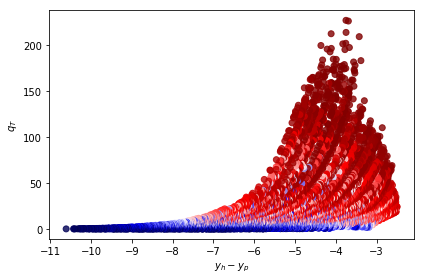

In [44]:
fig, ax, vert, hor = color_plot(data, "qT", "yh_minus_yp", cmap="seismic", alpha=0.8)
#ax.set_xscale("log")
plt.savefig("../Figs/eic_data_qT_rap.pdf")
plt.show()

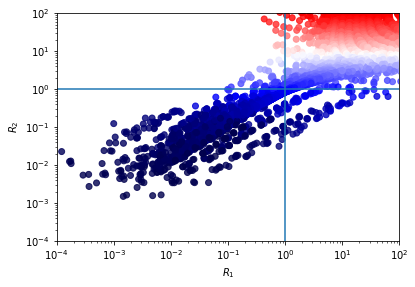

In [29]:
fig, ax, vert, hor = color_plot(data, "R2", "R1", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
ax.set_xscale("log")
ax.set_xlim([0.0001, 100])
plt.axhline(1, 0, 1)
plt.axvline(1, 0, 1)
plt.savefig("../Figs/eic_data_R2_R1.pdf")
plt.show()

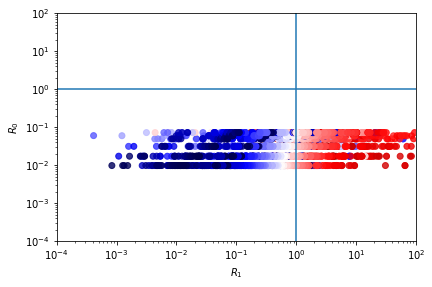

In [24]:
fig, ax, vert, hor = color_plot(data, "R0", "R1", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
ax.set_xscale("log")
ax.set_xlim([0.0001, 100])
plt.axhline(1, 0, 1)
plt.axvline(1, 0, 1)
plt.savefig("../Figs/hermes_data_R0_R1.pdf")
plt.show()

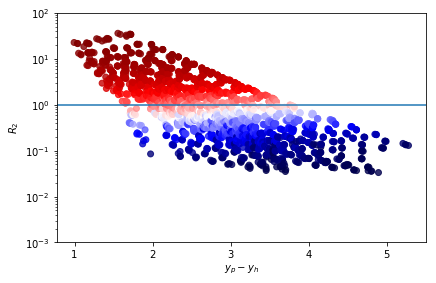

In [25]:
fig, ax, vert, hor = color_plot(data, "R2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001, 100])
plt.axhline(1, 0, 6)
plt.savefig("../Figs/hermes_data_R2.pdf")
plt.show()

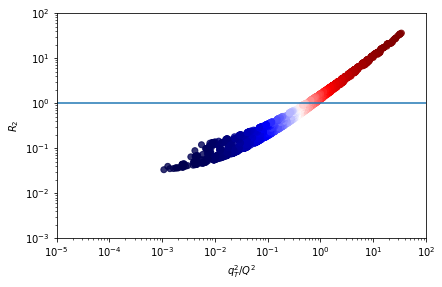

In [26]:
fig, ax, vert, hor = color_plot(data, "R2", "qToverQ2", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim([0.001, 100])
ax.set_xlim([0.00001, 100])
plt.axhline(1, 0, 6)
plt.savefig("../Figs/hermes_data_R2_qToverQ.pdf")
plt.show()

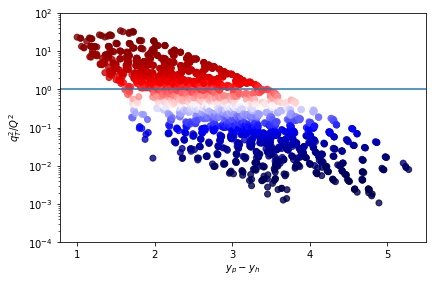

In [27]:

fig, ax, vert, hor = color_plot(data, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
plt.axhline(1, 0, 6)
plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

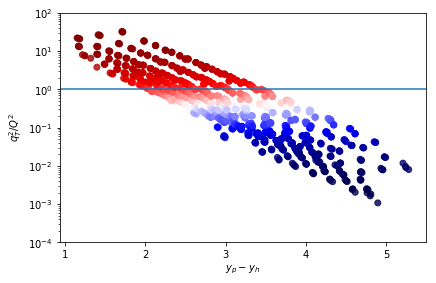

In [28]:
data_pion = data.query("hadron=='pi+' or hadron=='pi-'")
fig, ax, vert, hor = color_plot(data_pion, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
plt.axhline(1, 0, 6)
plt.savefig("../Figs/hermes_data_pion.pdf")
plt.show()

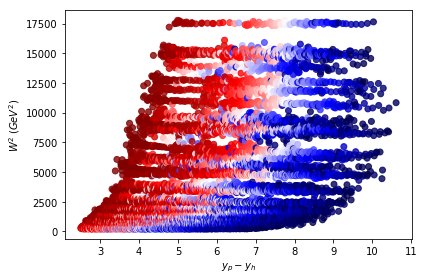

In [30]:
fig, ax, vert, hor = color_plot(data, "W2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,100])
# plt.axhline(1,0,6)
plt.savefig("../Figs/eic_data_all_W2.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "qToverQ2", "R", cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
# plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_all_qt_vs_R.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data_kaon, "qToverQ2", "R", cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
# plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_kaon_qt_vs_R.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data_pion, "qToverQ2", "R", cmap="seismic", alpha=0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.0001, 100])
# plt.axhline(1,0,6)
plt.savefig("../Figs/hermes_data_pion_qt_vs_R.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "Q2", "x", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,100])
# plt.axhline(1,0,6)
# plt.savefig("../Figs/hermes_data_all.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "R", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01, 10000])
plt.axhline(1., 0, 6)
plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

In [ ]:
filtered_data = data.query("x<0.12 and x>0.094")
fig, ax, vert, hor = color_plot(filtered_data, "R", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01, 10000])
plt.axhline(1., 0, 6)
# plt.savefig("../Figs/hermes_data_all_R.pdf")
plt.show()

In [ ]:
filtered_data["z"]

In [ ]:
fig, ax, vert, hor = color_plot(data, "lnR", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
plt.axhline(0, 0, 6)
plt.savefig("../Figs/hermes_data_all_lnR.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "yh", "yp", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
# plt.axhline(0,0,6)
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "yi", "yp", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
# plt.axhline(0,0,6)
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "yf", "yh", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
# plt.axhline(0,0,6)
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "yi_minus_yp", "yp", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
# plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yi_minus_yp.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(data, "yf_minus_yh", "yh", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.0001,10000])
# plt.axhline(0,0,6)
plt.savefig("../Figs/hermes_data_yf_minus_yh.pdf")
plt.show()

# Here we create filtered data with standard Torino cuts

In [ ]:
torino_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [ ]:
normal_length = len(torino_data)

len(torino_data.query("(pT/z)**2>=Q2"))

In [ ]:
len(torino_data)

In [ ]:
fig, ax, vert, hor = color_plot(torino_data, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01, 100])
plt.axhline(1., 0, 6)
plt.savefig("../Figs/hermes_data_torino.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(torino_data, "Q2", "x", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.01,100])
# plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_Q2_x.pdf")
plt.show()

In [ ]:
fig, ax, vert, hor = color_plot(torino_data, "Q2", "z", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.01,100])
# plt.axhline(1.,0,6)
plt.savefig("../Figs/hermes_data_Q2_z.pdf")
plt.show()

Let us see what happens if we add rapidity cut to Torino selection

In [ ]:
torino_data_rap = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>2.5")
len(torino_data_rap)

In [ ]:
len(torino_data_rap.query("(pT/z)**2>=Q2"))

In [ ]:
fig, ax, vert, hor = color_plot(torino_data_rap, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01, 100])
plt.axhline(1., 0, 6)
plt.savefig("../Figs/hermes_data_torino_rapidity.pdf")
plt.show()

# Here we create filtered data with TMD inspired cuts

In [ ]:
cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2")
#cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and dy>2.5")
print(len(cut_data_qt))
fig, ax, vert, hor = color_plot(cut_data_qt, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001, 1])
plt.axhline(0.15, 0, 6)
plt.savefig("../Figs/hermes_data_rapidity.pdf")
plt.show()

# Here we explore R cut

In [ ]:
print(np.min(data["lnR"]))
print(np.max(data["lnR"]))

In [ ]:
#cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2 and lnR<-1.5")
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-0.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001, 1])
plt.axhline(0.15, 0, 6)
plt.savefig("../Figs/hermes_data_R.pdf")
plt.show()

In [ ]:
cut_data_R = data.query("z>0.2 and z<0.6 and Q2>1.69 and lnR<-2.5")

print(len(cut_data_R))
fig, ax, vert, hor = color_plot(cut_data_R, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001, 1])
plt.axhline(0.15, 0, 6)
plt.savefig("../Figs/hermes_data_R25.pdf")
plt.show()

In [ ]:
#torino_data_x = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and x<0.1 and target=='proton' and hadron=='pi+'")
torino_data_x = data.query("x<0.096 and x>0.094 and target=='proton' and hadron=='pi+'")

fig, ax, vert, hor = color_plot(torino_data_x, "qToverQ2", "dy", cmap="seismic", alpha=0.8)
# ax.yscale('symlog')
# ax.set_yscale("log")
# ax.set_ylim([0.01,100])
# plt.axhline(0.15,0,6)
plt.show()